<a href="https://colab.research.google.com/github/Longbuivu/Artifical-Intelligence/blob/main/Nhan_Dang_10_Loai_Trai_Cay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bùi Vũ Long - 19146205

**Nhận dạng 10 loại trái cây**

In [1]:
#Kết nối với Google Drive
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
# link Google Drive data: https://drive.google.com/drive/folders/1-Cr4bV7j-_iGpdTaw1FUvosP5dAC3BQc?usp=sharing
#Các thư viện cần thiết
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#Tạo dữ liệu
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/10 Loai Trai Cay/Train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/10 Loai Trai Cay/Validation',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 1775 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [5]:
#Xử li dữ diệu
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [6]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [7]:
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose=1)

Epoch 1/100
56/56 [==============================] - 381s 7s/step - loss: 2.0327 - accuracy: 0.6761 - val_loss: 0.0459 - val_accuracy: 1.0000
Epoch 2/100
56/56 [==============================] - 16s 292ms/step - loss: 0.0778 - accuracy: 0.9752 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 3/100
56/56 [==============================] - 17s 295ms/step - loss: 0.0521 - accuracy: 0.9870 - val_loss: 0.2999 - val_accuracy: 0.8400
Epoch 4/100
56/56 [==============================] - 17s 298ms/step - loss: 0.0992 - accuracy: 0.9696 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 5/100
56/56 [==============================] - 16s 291ms/step - loss: 0.0287 - accuracy: 0.9927 - val_loss: 9.2930e-04 - val_accuracy: 1.0000
Epoch 6/100
56/56 [==============================] - 16s 293ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 1.2108e-04 - val_accuracy: 1.0000
Epoch 7/100
56/56 [==============================] - 16s 292ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.0946e-05 - val

Sai số kiểm tra là:  1.5139079323489568e-06
Độ chính xác kiểm tra là:  1.0


<function matplotlib.pyplot.show>

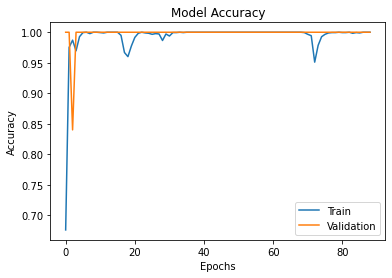

In [8]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [10]:
# Lưu mô hình
model.save('/content/drive/MyDrive/AI/10 Loai Trai Cay/10_Loai_Trai_Cay.h5')

In [11]:
# Tải mô hình
model=load_model('/content/drive/MyDrive/AI/10 Loai Trai Cay/10_Loai_Trai_Cay.h5')

In [12]:
#Gọi các lớp
classes=['Ca Chua','Ca Tim','Cam','Chanh','Cherry','Chuoi','Dua Hau','Ngo','Tao','Vai Thieu']

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Dua Hau


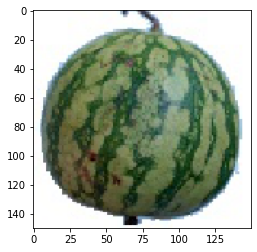

In [13]:
# Test
img=load_img("/content/drive/MyDrive/AI/10 Loai Trai Cay/Test/Dua Hau/126_100.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
print(result)
y_classes = [np.argmax(element) for element in result]
y_classes
classes[y_classes[0]]
if round(result[0][0])==1:
  prediction='Ca Chua'
if round(result[0][1])==1:
  prediction='Ca Tim'
if round(result[0][2])==1:
  prediction='Cam'
if round(result[0][3])==1:
  prediction='Chanh'
if round(result[0][4])==1:
  prediction='Cherry'
if round(result[0][5])==1:
  prediction='Chuoi'
if round(result[0][6])==1:
  prediction='Dua Hau'
if round(result[0][7])==1:
  prediction='Ngo'
if round(result[0][8])==1:
  prediction='Tao'
if round(result[0][9])==1:
  prediction='Vai Thieu'
print(prediction)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 7.2009403e-32 1.4069175e-28
  1.0000000e+00 3.3134130e-23 7.1198207e-16 0.0000000e+00 3.5588661e-33]]
Chuoi


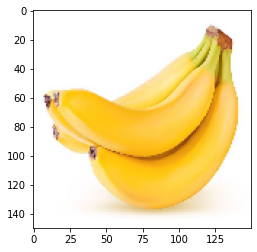

In [19]:
# Test
img=load_img("/content/drive/MyDrive/AI/10 Loai Trai Cay/Test/chuoi.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
print(result)
y_classes = [np.argmax(element) for element in result]
y_classes
classes[y_classes[0]]
if round(result[0][0])==1:
  prediction='Ca Chua'
if round(result[0][1])==1:
  prediction='Ca Tim'
if round(result[0][2])==1:
  prediction='Cam'
if round(result[0][3])==1:
  prediction='Chanh'
if round(result[0][4])==1:
  prediction='Cherry'
if round(result[0][5])==1:
  prediction='Chuoi'
if round(result[0][6])==1:
  prediction='Dua Hau'
if round(result[0][7])==1:
  prediction='Ngo'
if round(result[0][8])==1:
  prediction='Tao'
if round(result[0][9])==1:
  prediction='Vai Thieu'
print(prediction)

[[1.4942418e-30 1.1368173e-27 5.7361164e-26 2.6412377e-17 7.5119383e-25
  1.6120370e-12 1.3755084e-25 1.0000000e+00 1.3819914e-28 7.9256125e-21]]
Ngo


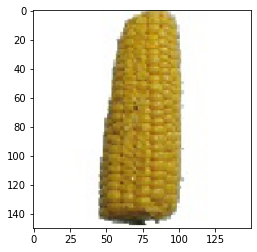

In [23]:
# Test
img=load_img("/content/drive/MyDrive/AI/10 Loai Trai Cay/Test/Ngo/2_100.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
print(result)
y_classes = [np.argmax(element) for element in result]
y_classes
classes[y_classes[0]]
if round(result[0][0])==1:
  prediction='Ca Chua'
if round(result[0][1])==1:
  prediction='Ca Tim'
if round(result[0][2])==1:
  prediction='Cam'
if round(result[0][3])==1:
  prediction='Chanh'
if round(result[0][4])==1:
  prediction='Cherry'
if round(result[0][5])==1:
  prediction='Chuoi'
if round(result[0][6])==1:
  prediction='Dua Hau'
if round(result[0][7])==1:
  prediction='Ngo'
if round(result[0][8])==1:
  prediction='Tao'
if round(result[0][9])==1:
  prediction='Vai Thieu'
print(prediction)